In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy.stats import zscore
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Activation
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [3]:
def get_model(x):
    model = tf.keras.Sequential()
    model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
    return model

dataset1 = 'dadosComLOG-MESs1pc-547-1892MESs.csv'
dataset2 = 'dadosComLOG-MESs-5pc-2734-8205-MESs.csv'
dataset3 = 'dadosComLOG-MESs10pc-5468-14495MESs.csv'
dataset4 = 'dadosComLOG-MESs10pc-5468-14495MESs.csv'


In [4]:
def rodar_KFold(pathfile, kFolds):
    dataset = pd.read_csv(pathfile, header=1)
    x = dataset.iloc[:,1:dataset.shape[1]].values
    y = dataset.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
    from keras.layers import Dropout
    # Cross-Validate
    kf = StratifiedKFold(n_splits=kFolds, shuffle=True, random_state=7)
    models = []
    history = []
    acuraciaTotal = 0
    fold = 0
    for train, test in kf.split(X_train, y_train):
        fold+=1
        print(f"Fold #{fold}")
        filepath= pathfile+str(fold)+"-val-acc.hdf5"
        acura_save = ModelCheckpoint(filepath ,save_best_only=True, verbose=0, monitor='val_accuracy', mode='max')
        model = get_model(x)
        history.append(model.fit(X_train[train], y_train[train], validation_data=(X_train[test], y_train[test]), 
                                 callbacks= [acura_save],
                                 verbose=0, batch_size=20, epochs=100))
        model.load_weights(filepath)
        models.append(model)
        _, accuracy = model.evaluate(X_train[test], y_train[test], verbose = 0)
        acuraciaTotal = acuraciaTotal + accuracy
        print('Accuracy: %.2f' % (accuracy*100))
        #_, accuracy = model.evaluate(X_test, y_test, verbose = 0)
        #print('AccuracyTest: %.2f' % (accuracy*100))
    acuraciaTotal = acuraciaTotal / kFolds
    print(f"Acuracia media de todos os K folds: {acuraciaTotal}")

    # Plotar grafico de cada fold

    for historico in history:
        plot_history(historico)
        
    return models, history

Fold #1
Accuracy: 70.00
Fold #2
Accuracy: 68.42
Fold #3
Accuracy: 63.16
Fold #4
Accuracy: 78.95
Fold #5
Accuracy: 63.16
Fold #6
Accuracy: 84.21
Fold #7
Accuracy: 63.16
Fold #8
Accuracy: 73.68
Fold #9
Accuracy: 72.22
Fold #10
Accuracy: 77.78
Acuracia media de todos os K folds: 0.7147368371486664


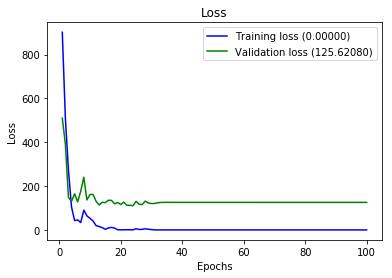

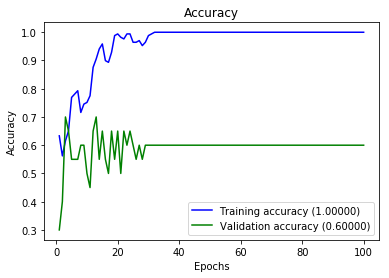

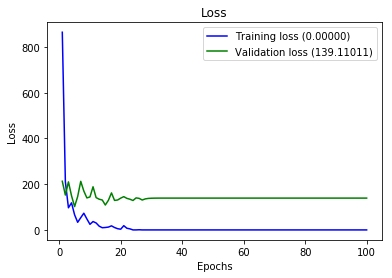

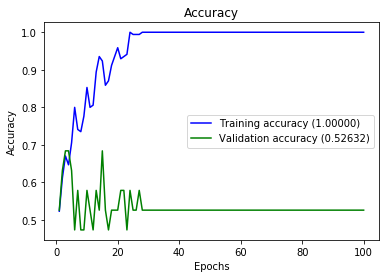

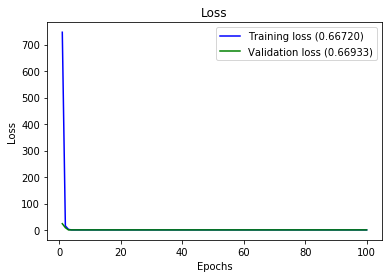

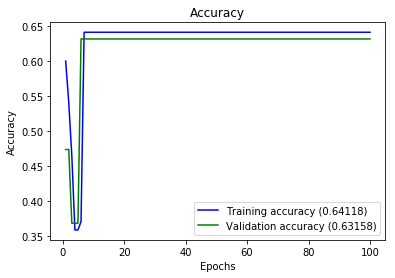

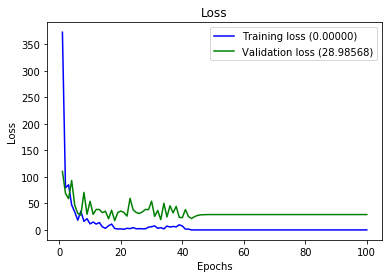

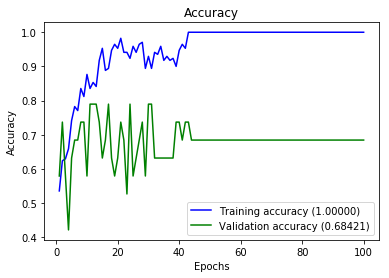

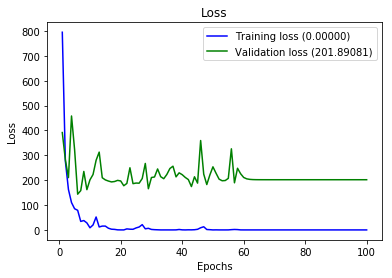

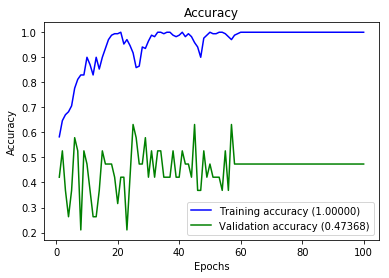

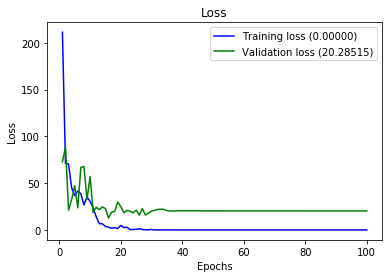

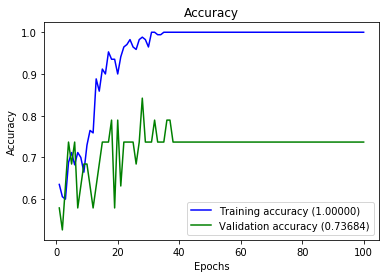

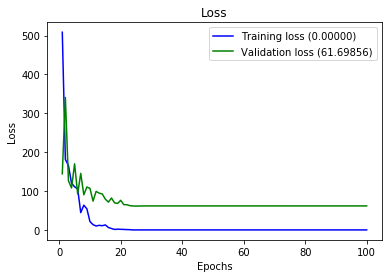

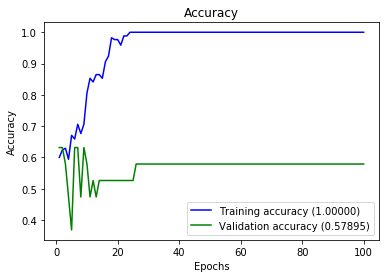

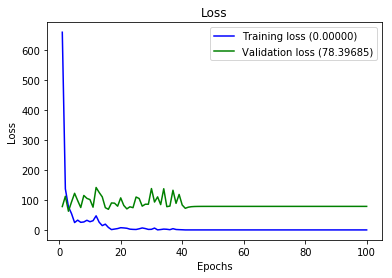

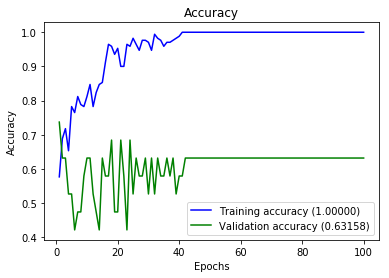

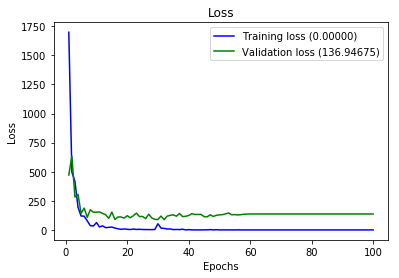

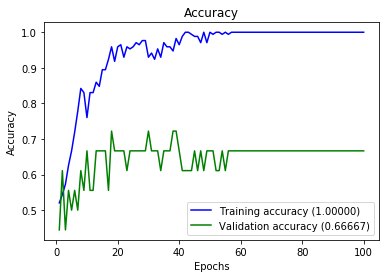

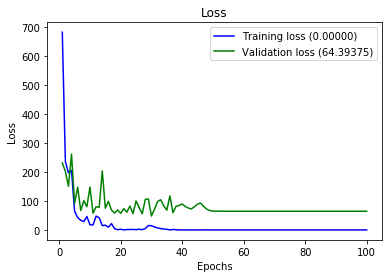

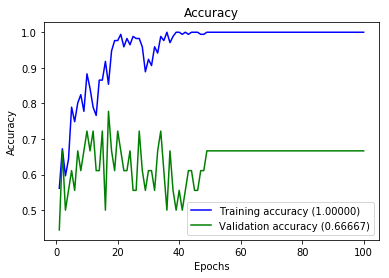

In [5]:
models, history = rodar_KFold(dataset1, 10)

Fold #1
Accuracy: 80.00
Fold #2
Accuracy: 65.00
Fold #3
Accuracy: 65.00
Fold #4
Accuracy: 60.00
Fold #5
Accuracy: 68.42
Fold #6
Accuracy: 94.44
Fold #7
Accuracy: 66.67
Fold #8
Accuracy: 83.33
Fold #9
Accuracy: 77.78
Fold #10
Accuracy: 83.33
Acuracia media de todos os K folds: 0.743976604938507


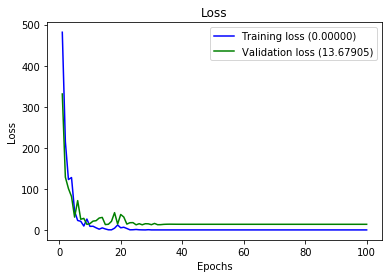

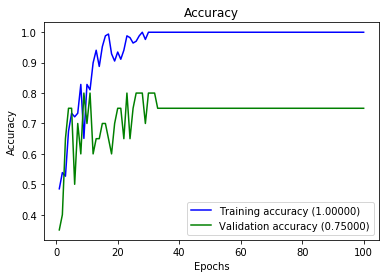

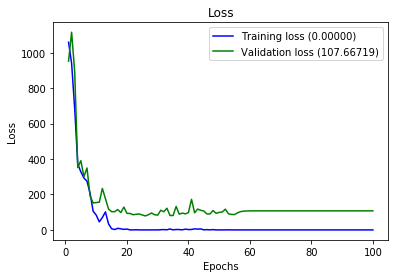

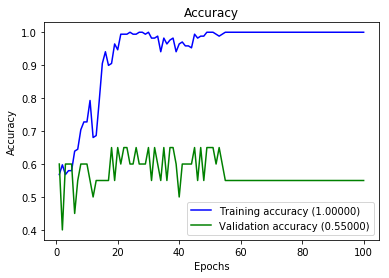

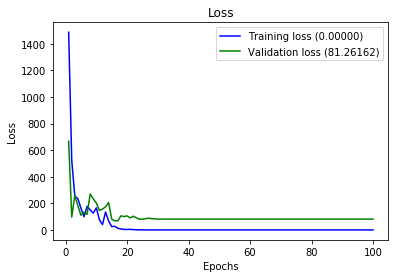

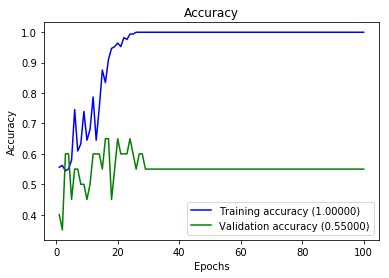

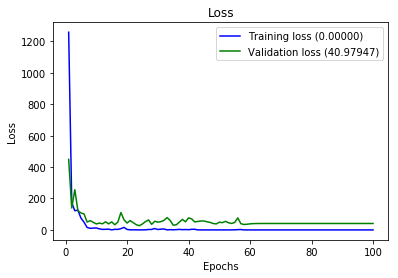

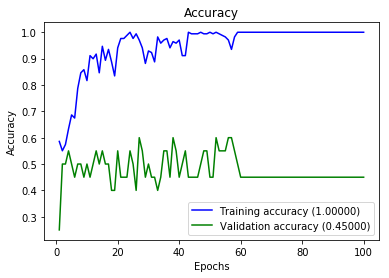

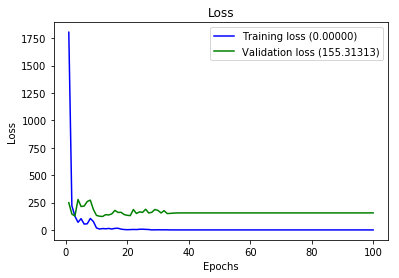

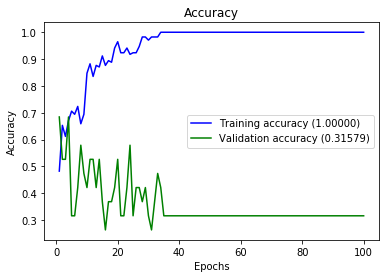

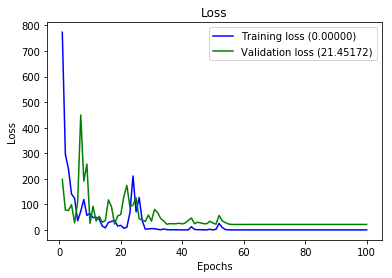

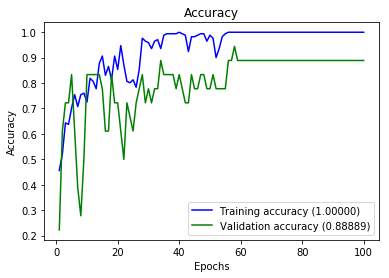

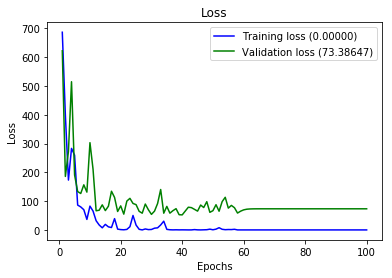

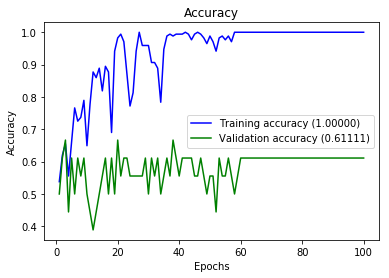

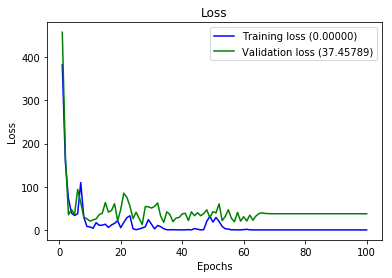

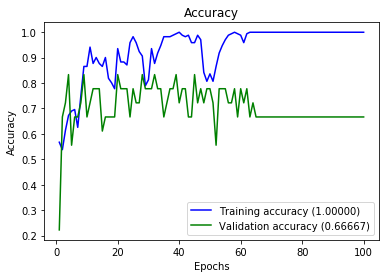

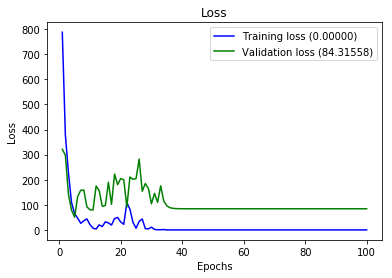

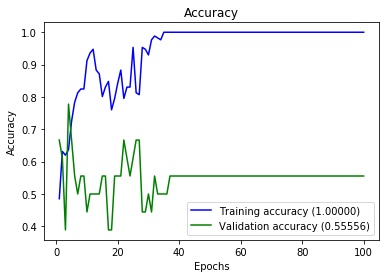

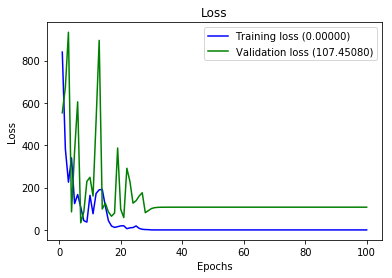

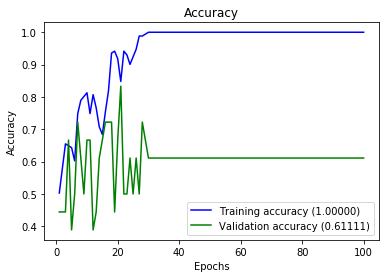

In [6]:
models, history = rodar_KFold(dataset2, 10)

Fold #1
Accuracy: 65.00
Fold #2
Accuracy: 75.00
Fold #3
Accuracy: 90.00
Fold #4
Accuracy: 85.00
Fold #5
Accuracy: 78.95
Fold #6
Accuracy: 88.89
Fold #7
Accuracy: 77.78
Fold #8
Accuracy: 77.78
Fold #9
Accuracy: 77.78
Fold #10
Accuracy: 72.22
Acuracia media de todos os K folds: 0.7883918166160584


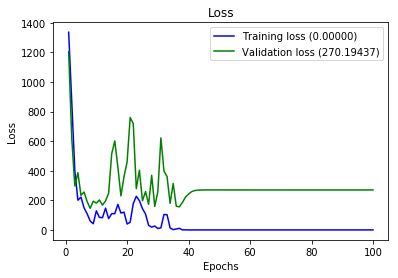

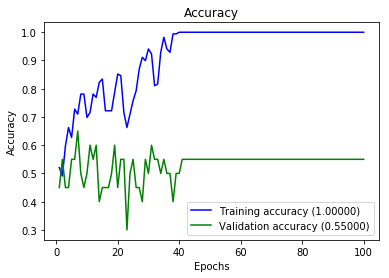

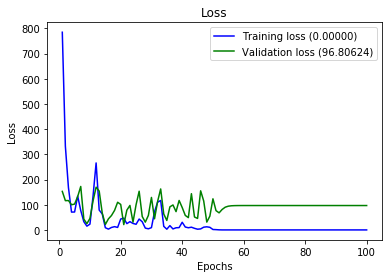

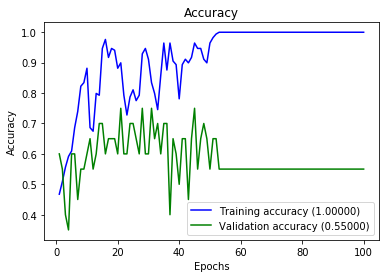

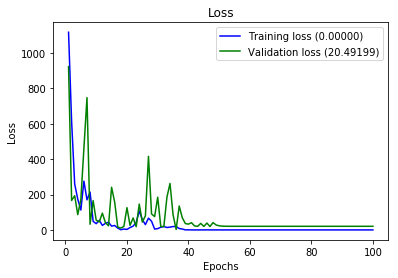

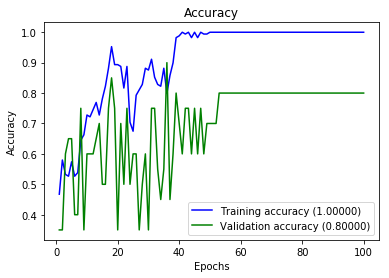

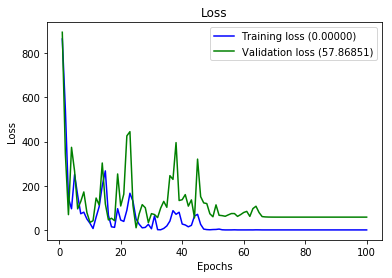

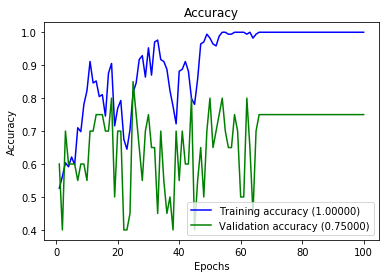

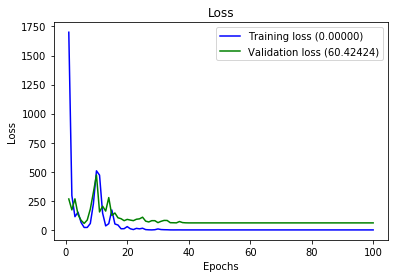

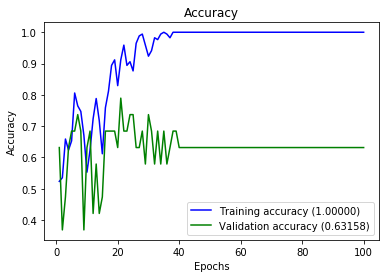

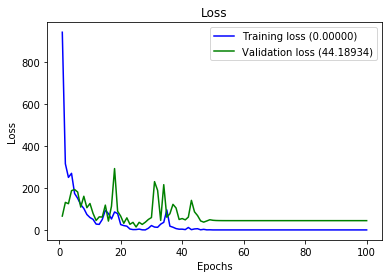

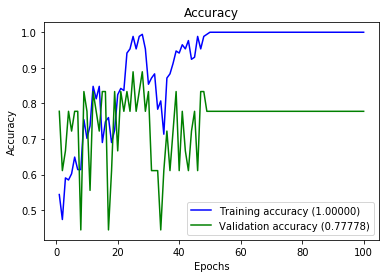

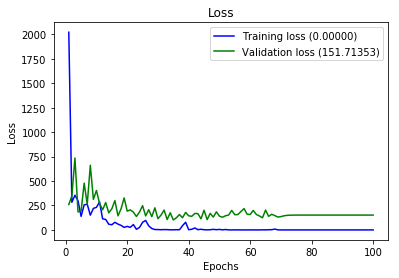

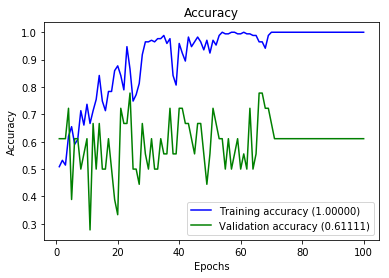

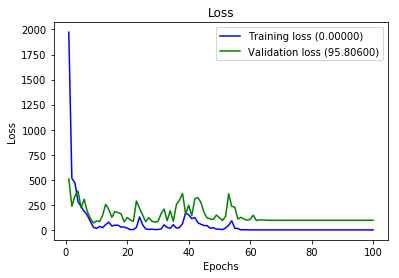

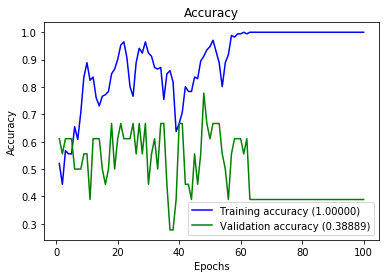

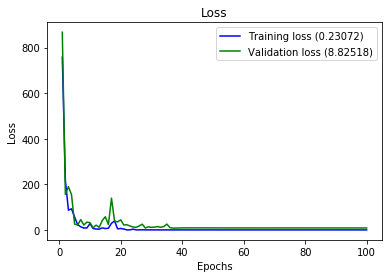

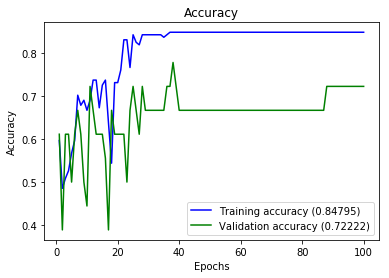

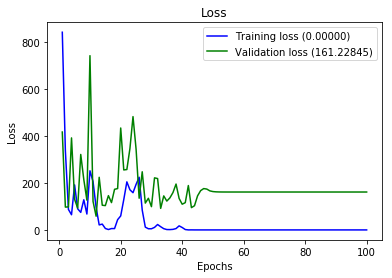

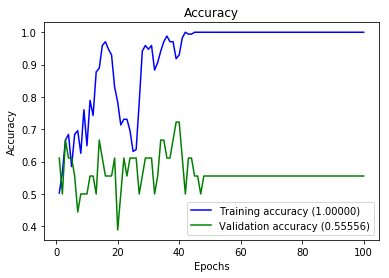

In [7]:
models, history = rodar_KFold(dataset3, 10)

Fold #1
Accuracy: 80.00
Fold #2
Accuracy: 75.00
Fold #3
Accuracy: 80.00
Fold #4
Accuracy: 75.00
Fold #5
Accuracy: 73.68
Fold #6
Accuracy: 77.78
Fold #7
Accuracy: 77.78
Fold #8
Accuracy: 77.78
Fold #9
Accuracy: 72.22
Fold #10
Accuracy: 77.78
Acuracia media de todos os K folds: 0.7670175492763519


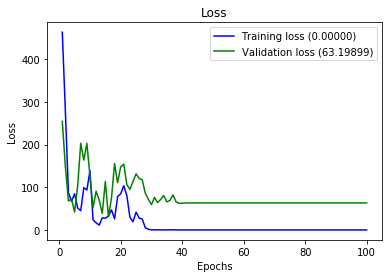

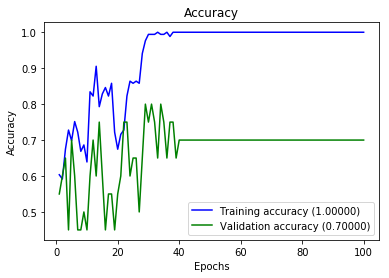

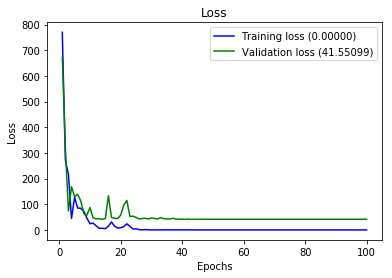

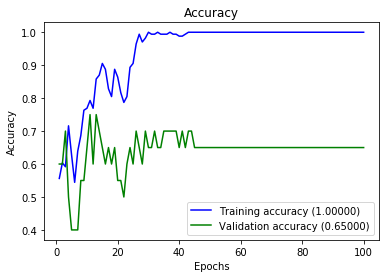

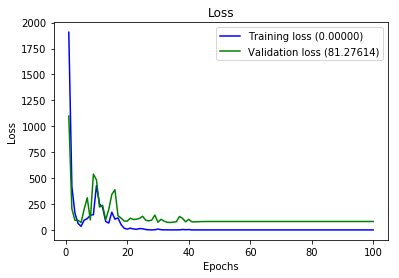

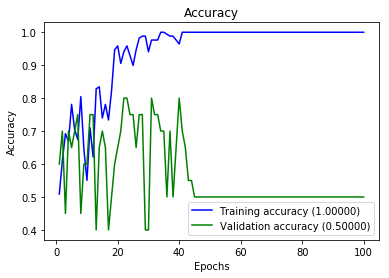

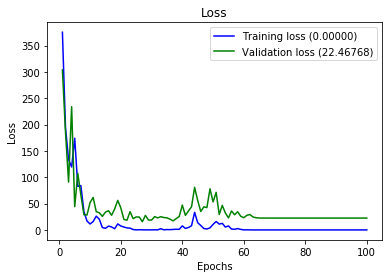

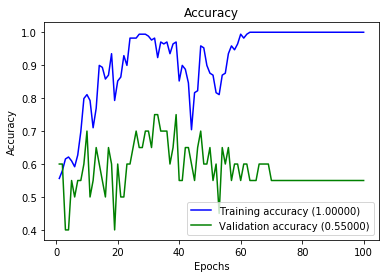

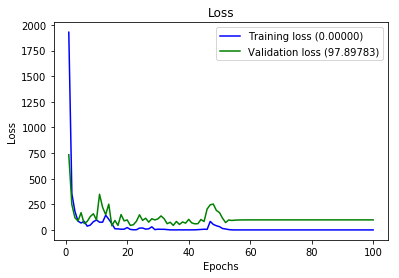

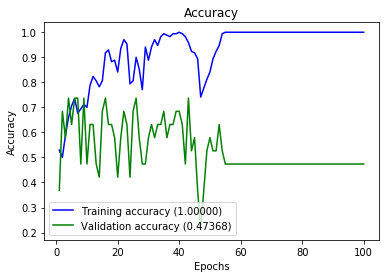

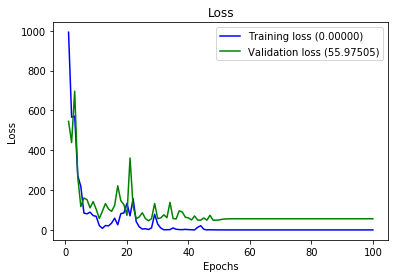

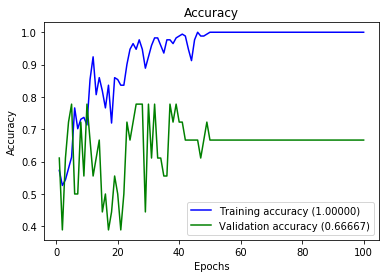

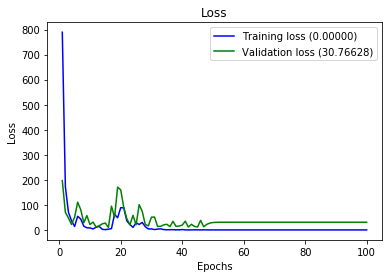

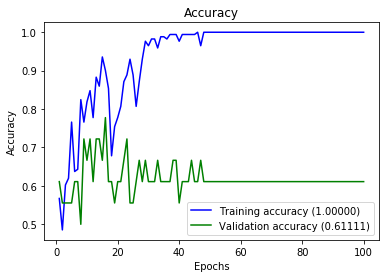

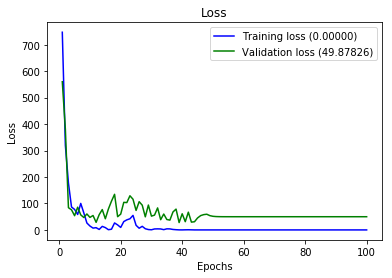

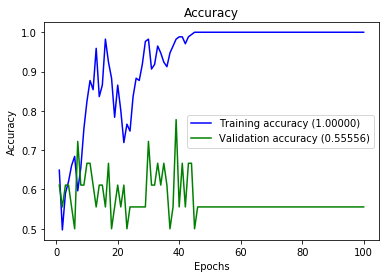

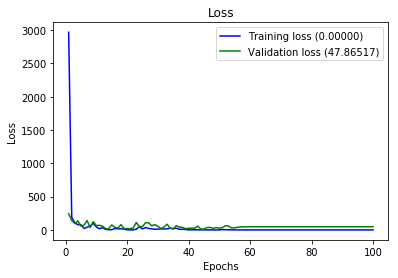

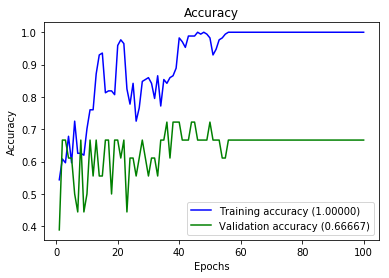

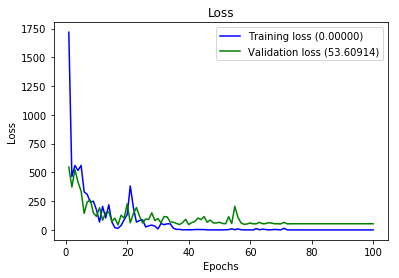

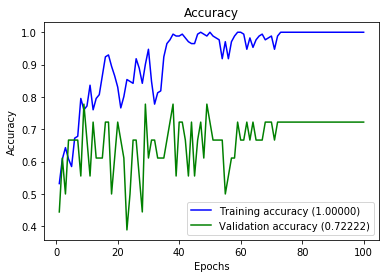

In [8]:
models, history = rodar_KFold(dataset4, 10)